# Mapas Auto-Organizáveis(SOM) - Outliers

In [1]:
import pandas as pd
import numpy as np
from minisom import MiniSom

## Obter os dados

In [2]:
base = pd.read_csv("personagens.csv")

In [3]:
base.head()

,laranja_camisa_bart,azul_calcao_bart,azul_sapato_bart,marrom_boca_homer,azul_calca_homer,cinza_sapato_homer,classe
0,6.886102,3.495204,1.484984,0.000000,0.0,0.062954,Bart
1,5.004901,3.183889,1.000142,0.000000,0.0,0.033024,Bart
2,5.264620,5.029683,0.283567,0.000000,0.0,0.151573,Bart
3,0.000000,0.000000,0.000000,0.480168,0.0,0.021164,Bart
4,8.978929,3.459119,0.000000,0.000000,0.0,0.011593,Bart


## Divisão dos dados

In [4]:
X = base.iloc[:, 0:6].values

In [5]:
y = base.iloc[:,6].values

## Normalização das Variaveis

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
# Passar os dados de entrada para uma escala de 0 a 1 para que o processamento dos dados seja mais rapido e tambem para não 
# haver variaveis que pela sua escala tenham mais influência no modelo(para não haver variáveis dominantes).
scaler = MinMaxScaler(feature_range=(0,1))

In [8]:
# Ajustar a variavel X para fazer a sua normalização.
scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [9]:
# Normalização da variavel X.
X = scaler.transform(X)

## Modelo do Mapa Auto-Organizável

In [10]:
# x: numero de linhas da matriz de saida
# y: numero de colunas da matriz de saida
# input_ten: número de variaveis de entrada
# sigma: Alcançe do raio traçado com o centro nos BMU e utilizado para a actualização dos seus vizinhos. 
# learning_rate: taxa de aprendizagem utilizada para a actualização do BMU e aproximação do seu valor ao valor do registro (e
# consequente actualização dos valores vizinhos).
# random_seed: Obter sempre o mesmo resultado para o modelo. A inicialização dos pesos tem sempre o mesmo valor.

# ransom_weights_init: Inicialização dos pesos da base de dados
# train_random: Treinar o modelo (num_iteration = número de epocas)

# 5xsqr(N), sendo N o nº de registros. Para 1997 registros: 5xsqr(1997) = 85,58 celulas = matriz 9x9.

model = MiniSom(x=9, y=9, input_len=6, sigma=1, learning_rate=0.5, random_seed=0)
model.random_weights_init(X)
model.train_random(data=X, num_iteration=500)

## Visualização dos resultados

In [11]:
from pylab import pcolor, colorbar, plot

In [12]:
# Transformação das classes em números para associar com os markers e colors 
y[y == 'Bart'] = 0
y[y == 'Homer'] = 1

In [13]:
# Lista com os marcadores
# "o" neurónio pertence à classe 0
# "s" neurónio pertence à classe 1
markers = ["o","s"]

In [14]:
# Lista com as cores
colors = ["r","g"]

### Mapa Auto-Organizável

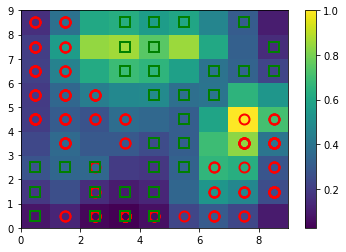

In [15]:
# i: indice de X
# x: linha inteira de X
# w: BMU de cada linha

# (+0.5)posicionar o simblo no meio do neurónio

pcolor(model.distance_map().T)
colorbar()

for i,x in enumerate(X):
    w = model.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markerfacecolor="None", 
    markersize=10, markeredgecolor=colors[y[i]], markeredgewidth=2) 

In [16]:
# Sendo os outliers os neurónios amarelos, visualizando o mapa apenas existe uma coordenada dessa cor.
# Os registros que escolheram esse neurónio como BMU têm grande probabilidade de serem outliers.

# mapeamento: Dicionário com os registros que escolheram o neurónio como BMU.
# suspeitos: Array com os neurónios suspeitos(Amarelos). Caso se aumente o número de épocas a possição dos nerónios amarelos é
# alterada.

mapeamento = model.win_map(X) 
suspeitos = mapeamento[(7,4)]
suspeitos = scaler.inverse_transform(suspeitos) # inverter a normalização para obter o clientid

In [17]:
# Para encontrar os possíveis outliers é necessário comparar cada uma das características da base original com a base de 
# suspeitos. Caso tivéssemos um atributo identificador para cada registro bastaria comparar o identificador.

classe = []
for i in range(len(base)):
    for j in range(len(suspeitos)):
       if ((base.iloc[i, 0] == suspeitos[j,0]) and
          (base.iloc[i, 1] == suspeitos[j,1]) and
          (base.iloc[i, 2] == suspeitos[j,2]) and
          (base.iloc[i, 3] == suspeitos[j,3]) and
          (base.iloc[i, 4] == suspeitos[j,4]) and
          (base.iloc[i, 5] == suspeitos[j,5])):
           classe.append(base.iloc[i,6])
classe = np.asarray(classe)

In [18]:
classe = np.array(classe)
classe

array([0])

In [19]:
suspeitos_final = np.column_stack((suspeitos, classe)) # juntar os suspeitos e a classe
suspeitos_final = suspeitos_final[suspeitos_final[:,4].argsort()] # ordenar de forma crescente pela coluna 4

In [20]:
suspeitos_final = pd.DataFrame(suspeitos_final)
suspeitos_final.columns = ["laranja_camisa_bart","azul_calcao_bart","azul_sapato_bart","marrom_boca_homer","azul_calca_homer","cinza_sapato_homer","classe"]
suspeitos_final

,laranja_camisa_bart,azul_calcao_bart,azul_sapato_bart,marrom_boca_homer,azul_calca_homer,cinza_sapato_homer,classe
0,4.658248,3.879911,1.197206,0.0,2.452788,0.009217,0.0
